In [ ]:
ml-zoomcamp-2025/01-intro/car_fuel_efficiency.csv

In [1]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('../01-intro/car_fuel_efficiency.csv', usecols=['engine_displacement',
                'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg'])

In [23]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
sns.histplot(df.vehicle_weight)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

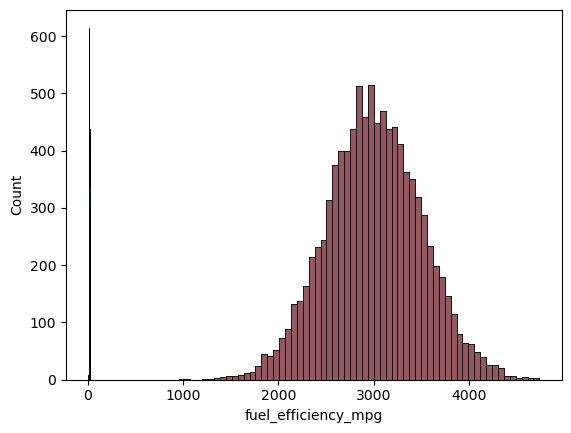

In [26]:
plt.show()

In [28]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [32]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [33]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [34]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [35]:
idx = np.arange(n)

In [38]:
np.random.seed(42)
np.random.shuffle(idx)

In [39]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [40]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
9136,140,151.0,3657.145232,2011,12.101976
9433,210,159.0,3739.142722,2014,11.475593
7221,200,143.0,3494.725344,2014,13.348308
4986,160,NaN,2592.486385,2018,17.463928
5888,180,140.0,3596.988310,2019,11.058014


In [41]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [43]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [44]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [49]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

## With 0

In [56]:
# X_train = df_train.fillna(0).values

# w0, w = train_linear_regression(X_train, y_train)

# y_pred = w0 + X_train.dot(w)

In [59]:
def prepare_X(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [60]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5163173099504096)

## With mean

In [53]:
def prepare_X(df):
    df_num = df.fillna(df_train.mean())
    X = df_num.values
    return X

In [54]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.4584068514492169)

## Regularization

In [61]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [62]:
def prepare_X(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [65]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score, 4))

0 26.043309144972476 0.5163
0.01 22.48444363491549 0.5169
0.1 10.083316925208148 0.5211
1 1.5476126238007455 0.5258
5 0.324977239288856 0.5266
10 0.16351237109644032 0.5267
100 0.01645069712244113 0.5268


In [107]:
def prepare_X(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

rmse_list = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
                                
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    rmse_list.append(rmse(y_val, y_pred))

In [108]:
rmse_list

[np.float64(0.5206531296263988),
 np.float64(0.5213388912862129),
 np.float64(0.5228069974646676),
 np.float64(0.5159516741272678),
 np.float64(0.5109129460100481),
 np.float64(0.5283406460150374),
 np.float64(0.5313910658199212),
 np.float64(0.5090670387337807),
 np.float64(0.5147399129384682),
 np.float64(0.5131865908366466)]

In [109]:
round(np.std(rmse_list),3)

np.float64(0.007)

In [99]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [100]:
def prepare_X(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [101]:
df_full_train = pd.concat([df_train, df_val])

In [102]:
df_full_train = df_full_train.reset_index(drop=True)

In [103]:
X_full_train = prepare_X(df_full_train)

In [104]:
y_full_train = np.concatenate([y_train, y_val])

In [105]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [106]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.5156261299162689)